In [4]:
import numpy as np
import pickle
with open('opt_5bit/dataset_5.pkl', "rb")as f:
    train_dataset, validation_dataset, test_dataset = pickle.load(f)

total_dataset_1 = np.concatenate([train_dataset, validation_dataset, test_dataset])
reals_1, durations = [],[]
for cir in total_dataset_1:
    reals_1.append(cir['ground_truth_fidelity'])
    durations.append(cir['duration'])
reals_1 = np.array(reals_1)

In [2]:
import numpy as np
import pickle
with open('opt_remove_error_pattern/dataset_5.pkl', "rb")as f:
    train_dataset, validation_dataset, test_dataset = pickle.load(f)

total_dataset_2 = np.concatenate([train_dataset, validation_dataset, test_dataset])
reals_2,durations = [],[]
for cir in total_dataset_2:
    reals_2.append(cir['ground_truth_fidelity'])
    durations.append(cir['duration'])
reals_2 = np.array(reals_2)

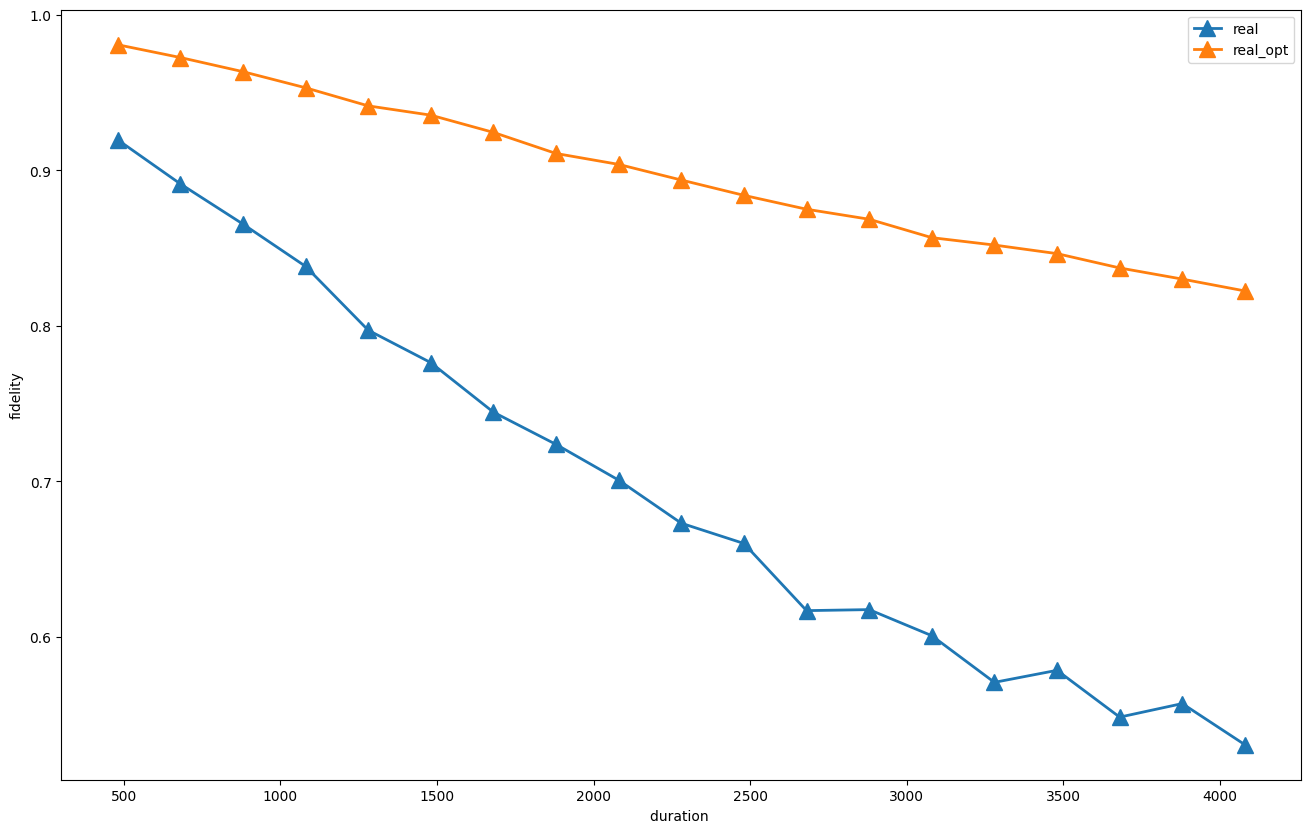

In [12]:
from plot.plot import get_duration2circuit_infos
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(16, 10)) 

durations = np.array(durations)    

duration_X, duration2circuit_index = get_duration2circuit_infos(durations,200,4000)

real_y1,real_y2 = [],[]
for circuit_index in duration2circuit_index:
    real_y1.append(reals_1[circuit_index].mean())
    real_y2.append(reals_2[circuit_index].mean())


axes.plot(duration_X, real_y1 ,markersize = 12,linewidth = 2, label='real',marker = '^' )
axes.plot(duration_X, real_y2 ,markersize = 12,linewidth = 2, label='real_opt',marker = '^' )
axes.set_xlabel('duration ')
axes.set_ylabel('fidelity')
axes.legend() # 添加图例
fig.show()

In [13]:
fig.savefig('opt_remove_error_pattern/remore_error_opt.svg')

In [10]:
real_y1 =np.array(real_y1)
real_y2 =np.array(real_y2)
real_y1,real_y2

(array([0.91958412, 0.89126866, 0.86540944, 0.83822433, 0.79720463,
        0.77633275, 0.74450353, 0.7237831 , 0.70081796, 0.67312908,
        0.66010488, 0.61694632, 0.61759734, 0.60084478, 0.57084277,
        0.57858602, 0.54849642, 0.55720513, 0.53076144]),
 array([0.98065652, 0.97244199, 0.96334697, 0.95299425, 0.94136188,
        0.93539661, 0.92431317, 0.910755  , 0.9037427 , 0.89369826,
        0.88385065, 0.87492952, 0.86849351, 0.85665788, 0.85190395,
        0.84638905, 0.83719013, 0.83002205, 0.82240642]))

In [11]:
(1-real_y1) / (1 - real_y2)

array([4.15725982, 3.94554474, 3.67201714, 3.44161417, 3.45842212,
       3.46215954, 3.37570596, 3.09504054, 3.10814924, 3.0749348 ,
       2.92636268, 3.06270259, 2.90786144, 2.78463306, 2.89783028,
       2.74338505, 2.77319536, 2.60501368, 2.64220449])